Message Frequency Analysis

Run this file in the python environment

__________________________________________________

Import the csv datafile here.

In the file explorer right click the dataset and copy path, then paste between the "..."

Any backslashes should be replaced by double backslash.

Make sure that the csv file is seperated by commas.

In [6]:
import pandas as pd
ais = pd.read_csv("Dataset_fulldata.csv",sep=",")
ais.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_10232\4007436455.py:2: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv("Dataset_fulldata.csv",sep=",")


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,ETA,A,B,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2023-10-28 07:17:52.488,BSADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,STX564855481005,71220.0,V,0.0,I
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,0.0,11.3,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2023-10-28 07:17:53.519,PSTXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,INFO,2.0,0,0.0,1


In [20]:
ais.shape

(6599735, 34)

Subset the dataset for a specific region

In [21]:
ais = ais[ais["Region"]=='QH69']

In [22]:
# Convert 'Timestamp' column to datetime type
ais['Timestamp'] = pd.to_datetime(ais['Timestamp'])

# Sort the DataFrame by 'MMSI' and 'Timestamp' to ensure proper order within each vessel
ais = ais.sort_values(by=['MMSI', 'Timestamp'])

# Calculate the time difference between consecutive messages for each vessel (grouped by 'MMSI')
ais['time_diff'] = ais.groupby('MMSI')['Timestamp'].diff()

# Display the first 10 entries of the 'time_diff' column
ais['time_diff'].head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_10232\2172736807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais['Timestamp'] = pd.to_datetime(ais['Timestamp'])


81934                      NaT
81949   0 days 00:00:09.999000
81965   0 days 00:00:10.001000
81982          0 days 00:00:10
81998          0 days 00:00:10
Name: time_diff, dtype: timedelta64[ns]

In [23]:
# Convert the 'time_diff' column to string type and fill missing values
ais['time_diff'] = ais['time_diff'].fillna('00:00:00')
ais['time_diff'] = ais['time_diff'].astype(str)

# Split the 'time_diff' column and extract the seconds and minutes part
ais['seconds'] = ais['time_diff'].str.split(':').str[-1].astype(float)
ais['minutes'] = ais['time_diff'].str.split(':').str[-2].astype(float)

# Check the results
ais.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
81934,2023-10-29 02:56:30.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,0.000,0.0
81949,2023-10-29 02:56:40.996,BSVDO,B,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.999000,9.999,0.0
81965,2023-10-29 02:56:50.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.001000,10.001,0.0
81982,2023-10-29 02:57:00.997,BSVDO,B,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10,10.000,0.0
81998,2023-10-29 02:57:10.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10,10.000,0.0


In [24]:
# Remove "0 days " from the time_diff
ais['time_diff'] = ais['time_diff'].str.replace('0 days ', '')

# Convert the cleaned strings to timedelta
ais['time_diff'] = pd.to_timedelta(ais['time_diff'])

Subset based on the shipborne mobile equipement reporting intervals (see report for more info)

In [25]:
# Ensure that the "SOG" column is numerical type for the subsetting
ais["SOG"] = pd.to_numeric(ais["SOG"], errors='coerce')

# Ship at anchor or moored and not moving faster than 3 knots
ais_anchor_less_3knots = ais[
    (ais["SOG"] < 3.0) & 
    ((ais["Navigation Status"] == 'At anchor') | 
     (ais["Navigation Status"] == 'Moored'))
]

# Ship at anchor or moored and moving faster than 3 knots
ais_anchor_more_3knots = ais[
    (ais["SOG"] > 3.0) & 
    ((ais["Navigation Status"] == 'At anchor') | 
     (ais["Navigation Status"] == 'Moored'))
]

# Ship 0-14 knots
ais_0_14 = ais[
    ((ais["SOG"] > 0.0) &
     (ais["SOG"]<= 14.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_0_14_turning = ais[
    ((ais["SOG"] > 0.0) &
     (ais["SOG"]<= 14.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]
ais_14_23 = ais[
    ((ais["SOG"] > 14.0) &
     (ais["SOG"]<= 23.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_14_23_turning = ais[
    ((ais["SOG"] > 14.0) &
     (ais["SOG"]<= 23.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]

ais_more_23 = ais[
    (ais["SOG"] > 23.0)
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_more_23_turning = ais[
    (ais["SOG"] > 23.0)
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]


Ship at anchor or moored and not moving faster than 3 knots

In [26]:
ais_anchor_less_3knots[ais_anchor_less_3knots["minutes"]>3.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
3375111,2023-12-12 11:32:48.550,BSVDM,B,3.0,503486000.0,At anchor,0.0,0.0,127.0,0.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,15 days 14:47:20.979000,20.979,47.0
3381139,2023-12-12 12:59:48.325,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,0.0,0.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:06:01.285000,1.285,6.0
3392224,2023-12-12 16:23:47.991,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,0.0,0.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:06:00.280000,0.280,6.0
3392960,2023-12-12 16:38:48.093,BSVDM,B,3.0,503486000.0,At anchor,0.0,0.0,0.0,0.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:09:00.680000,0.680,9.0
3396659,2023-12-12 17:56:47.603,BSVDM,B,3.0,503486000.0,At anchor,0.0,0.0,127.0,0.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:06:00.740000,0.740,6.0
3398629,2023-12-12 18:41:46.929,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,129.0,0.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:05:58.221000,58.221,5.0
3403024,2023-12-12 20:11:46.863,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,129.0,0.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:05:59.319000,59.319,5.0
3403987,2023-12-12 20:29:47.286,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,0.0,0.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:06:00.560000,0.560,6.0
3404346,2023-12-12 20:35:48.366,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,129.0,0.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:06:01.080000,1.080,6.0
3405715,2023-12-12 20:59:47.773,BSVDM,A,3.0,503486000.0,At anchor,0.0,0.0,129.0,0.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:05:59.984000,59.984,5.0


Plot this data into a map to see the route where the frequency requirements where not met.

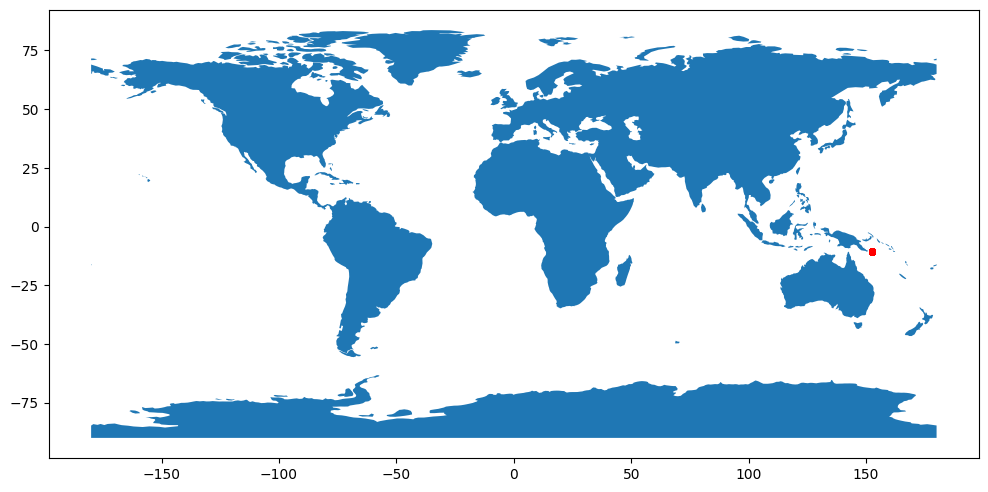

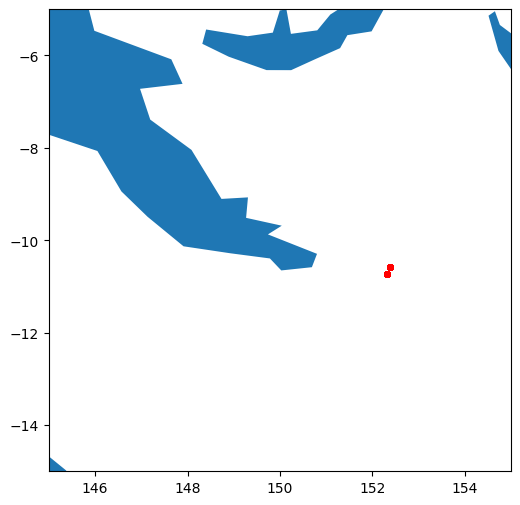

In [27]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_anchor_less_3knots['Longitude'], ais_anchor_less_3knots['Latitude'])]
gdf = GeoDataFrame(ais_anchor_less_3knots, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship at anchor or moored and moving faster than 3 knots

In [28]:
ais_anchor_more_3knots[ais_anchor_more_3knots["seconds"]>10.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
421525,2023-11-02 16:56:27.547,BSVDM,B,1.0,431853000,At anchor,0.0,0.0,0.0,9.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:03:38.891000,38.891,3.0
421548,2023-11-02 16:56:48.547,BSVDM,B,1.0,431853000,At anchor,0.0,0.0,0.0,9.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:21,21.000,0.0
421564,2023-11-02 16:57:07.289,BSVDM,B,1.0,431853000,At anchor,0.0,0.0,0.0,9.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:18.742000,18.742,0.0
421588,2023-11-02 16:57:27.546,BSVDM,B,1.0,431853000,At anchor,0.0,0.0,0.0,9.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:20.257000,20.257,0.0
421683,2023-11-02 16:59:07.307,BSVDM,B,1.0,431853000,At anchor,0.0,0.0,0.0,9.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:01:39.761000,39.761,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683060,2024-01-14 13:21:21.171,BSVDM,B,1.0,636092980,Moored,0.0,0.0,0.0,8.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.176000,11.176,0.0
5683094,2024-01-14 13:22:09.994,BSVDM,A,1.0,636092980,Moored,0.0,0.0,0.0,8.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:39.919000,39.919,0.0
5683102,2024-01-14 13:22:21.171,BSVDM,B,1.0,636092980,Moored,0.0,0.0,0.0,8.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.177000,11.177,0.0
5683120,2024-01-14 13:22:49.651,BSVDM,A,1.0,636092980,Moored,0.0,0.0,0.0,8.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:19.577000,19.577,0.0


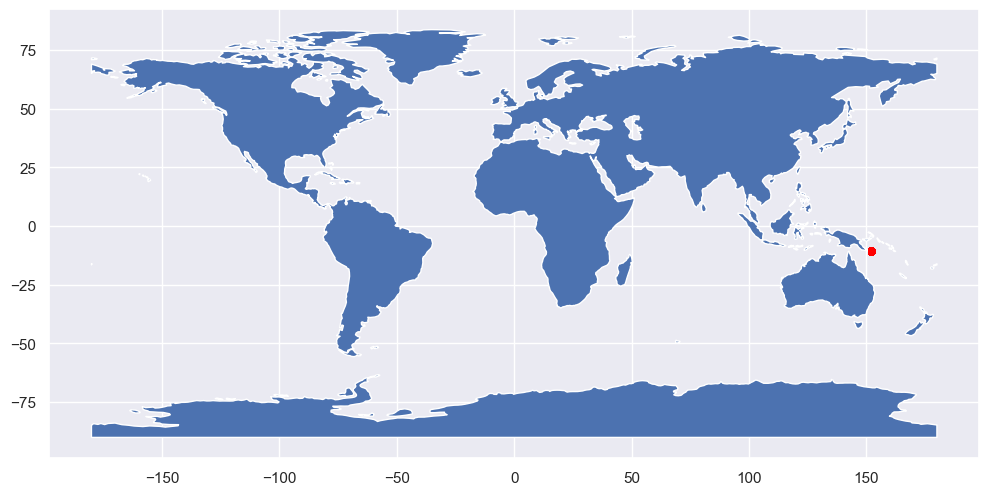

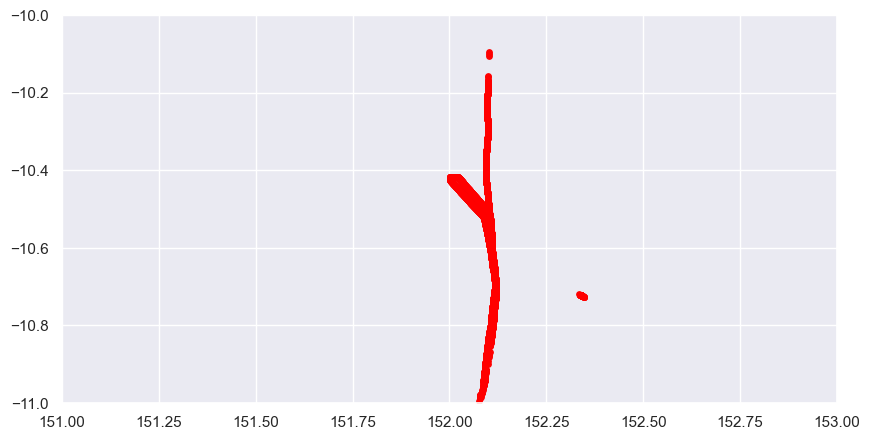

In [53]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_anchor_more_3knots['Longitude'], ais_anchor_more_3knots['Latitude'])]
gdf = GeoDataFrame(ais_anchor_more_3knots, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(151, 153) #long
ax.set_ylim(-11, -10) #lat

# Show the plot
plt.show()

Ship 0-14 knots

In [30]:
ais_0_14[ais_0_14["seconds"]>10]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
4571146,2023-12-29 05:17:11.651,BSVDM,B,1.0,205776000.0,Underway using engine,0.0,0.0,0.0,11.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.099000,10.099,0.0
4571164,2023-12-29 05:17:31.672,BSVDM,B,1.0,205776000.0,Underway using engine,0.0,0.0,0.0,11.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.241000,10.241,0.0
4571170,2023-12-29 05:17:42.672,BSVDM,A,1.0,205776000.0,Underway using engine,0.0,0.0,0.0,11.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11,11.000,0.0
4571192,2023-12-29 05:18:11.652,BSVDM,B,1.0,205776000.0,Underway using engine,0.0,0.0,0.0,11.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.460000,10.460,0.0
4571207,2023-12-29 05:18:31.793,BSVDM,B,1.0,205776000.0,Underway using engine,0.0,0.0,0.0,11.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.361000,10.361,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546782,2023-12-28 19:35:46.376,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.441000,10.441,0.0
4546795,2023-12-28 19:35:56.734,BSVDM,B,1.0,636093180,Underway using engine,0.0,0.0,0.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.358000,10.358,0.0
4546848,2023-12-28 19:36:26.937,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.344000,10.344,0.0
4546878,2023-12-28 19:36:46.376,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.521000,10.521,0.0


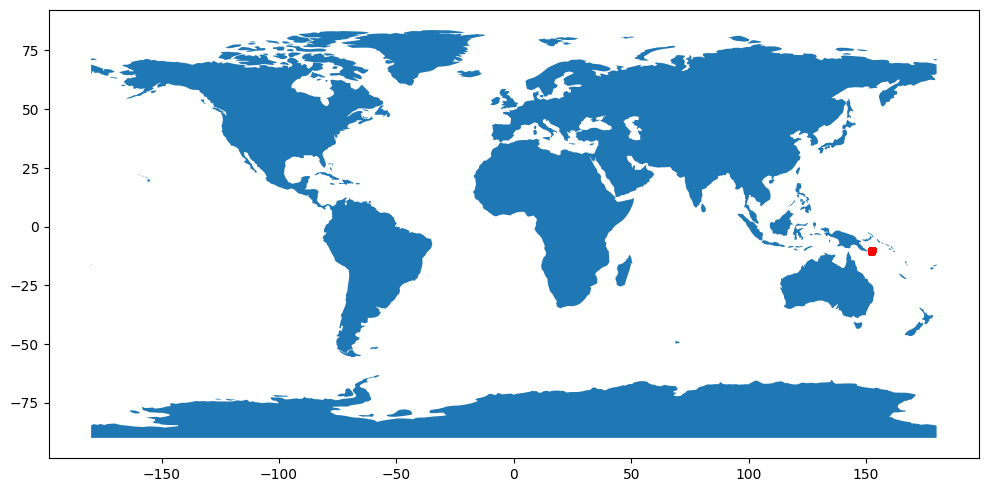

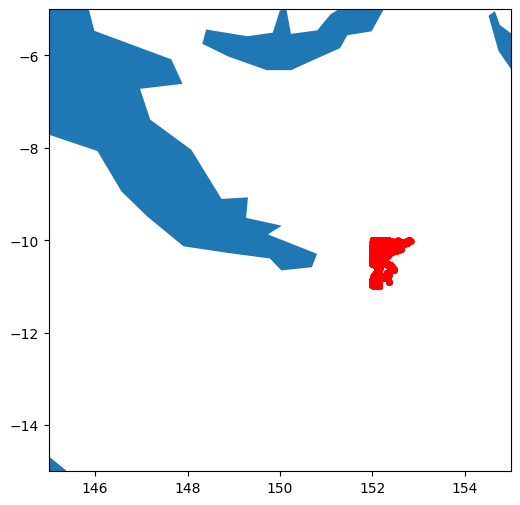

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_0_14['Longitude'], ais_0_14['Latitude'])]
gdf = GeoDataFrame(ais_0_14, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 0-14 knots and changing course

In [32]:
ais_0_14_turning[ais_0_14_turning["seconds"]>3.333]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
4573379,2023-12-29 06:02:31.023,BSVDM,B,1.0,205776000.0,Underway using engine,0.0,0.0,127.0,11.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:08.424000,8.424,0.0
4573388,2023-12-29 06:02:42.820,BSVDM,A,1.0,205776000.0,Underway using engine,0.0,0.0,127.0,11.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.797000,11.797,0.0
4573831,2023-12-29 06:11:02.141,BSVDM,A,1.0,205776000.0,Underway using engine,0.0,0.0,127.0,12.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.760000,10.760,0.0
3620207,2023-12-15 08:17:18.023,BSVDM,B,1.0,209034000.0,Underway using engine,0.0,0.0,129.0,10.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.201000,10.201,0.0
769273,2023-11-07 10:04:30.863,BSVDM,B,1.0,209271000.0,Underway using engine,0.0,0.0,255.0,11.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.779000,10.779,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546692,2023-12-28 19:34:46.376,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,253.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.441000,10.441,0.0
4546705,2023-12-28 19:34:55.576,BSVDM,B,1.0,636093180,Underway using engine,0.0,0.0,255.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.200000,9.200,0.0
4546721,2023-12-28 19:35:06.094,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,253.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.518000,10.518,0.0
4546736,2023-12-28 19:35:16.593,BSVDM,B,1.0,636093180,Underway using engine,0.0,0.0,255.0,11.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.499000,10.499,0.0


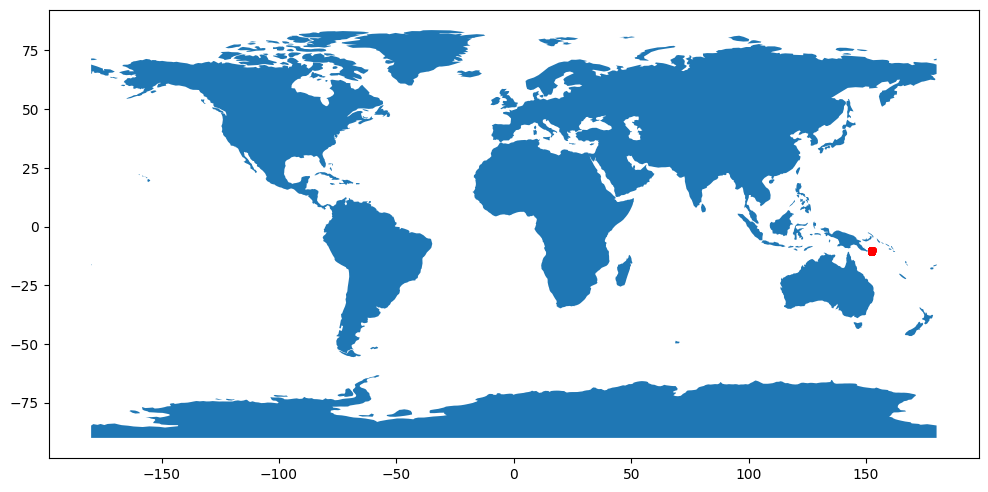

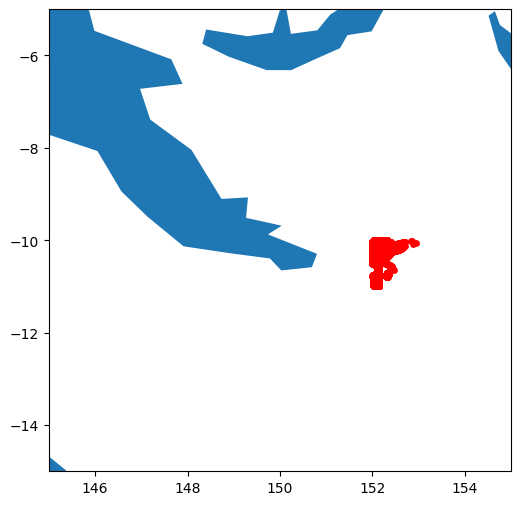

In [33]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_0_14_turning['Longitude'], ais_0_14_turning['Latitude'])]
gdf = GeoDataFrame(ais_0_14_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 14-23 knots

In [34]:
ais_14_23[ais_14_23["seconds"]>6]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
1162888,2023-11-12 17:55:46.280,BSVDM,A,1.0,210493000.0,Underway using engine,0.0,0.0,0.0,14.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.480000,6.480,0.0
1162898,2023-11-12 17:55:58.760,BSVDM,A,1.0,210493000.0,Underway using engine,0.0,0.0,0.0,14.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.960000,6.960,0.0
1162909,2023-11-12 17:56:16.280,BSVDM,B,1.0,210493000.0,Underway using engine,0.0,0.0,0.0,14.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.499000,6.499,0.0
1162918,2023-11-12 17:56:28.520,BSVDM,B,1.0,210493000.0,Underway using engine,0.0,0.0,0.0,14.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.579000,6.579,0.0
1162922,2023-11-12 17:56:34.863,BSVDM,A,1.0,210493000.0,Underway using engine,0.0,0.0,0.0,14.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.343000,6.343,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461892,2023-12-13 09:32:30.110,BSVDM,B,1.0,636093180,Underway using engine,0.0,0.0,0.0,14.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.679000,6.679,0.0
3461918,2023-12-13 09:32:47.376,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,14.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.439000,11.439,0.0
3462069,2023-12-13 09:34:47.351,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,14.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:29.974000,29.974,0.0
3462084,2023-12-13 09:34:59.812,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,0.0,14.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.476000,6.476,0.0


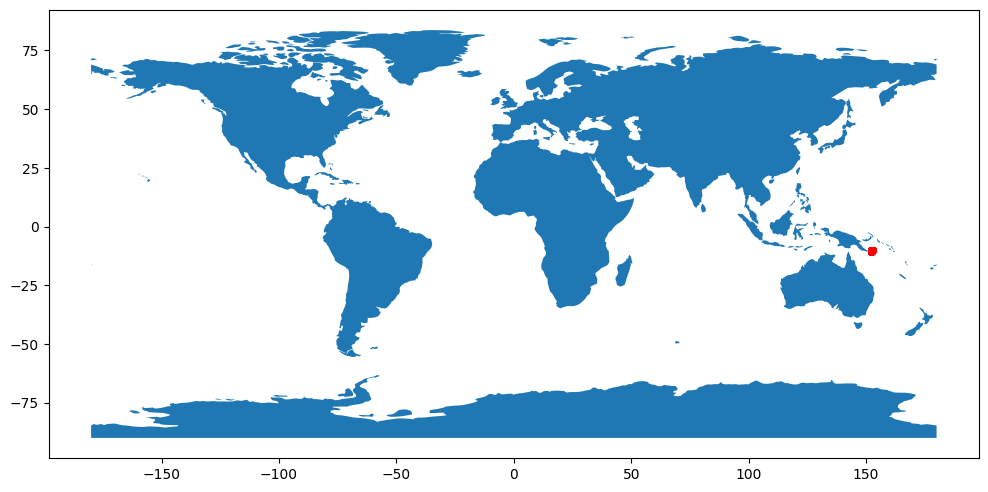

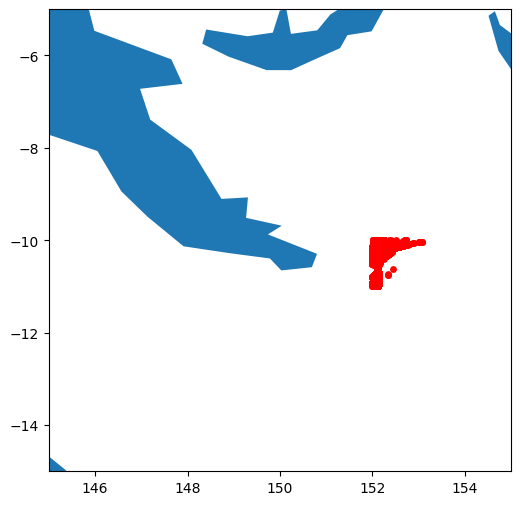

In [35]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_14_23['Longitude'], ais_14_23['Latitude'])]
gdf = GeoDataFrame(ais_14_23, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 14-23 knots and changing course

In [36]:
ais_14_23_turning[ais_14_23_turning["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
1166055,2023-11-12 19:04:57.015,BSVDM,B,3.0,210493000.0,Underway using engine,0.0,0.0,127.0,15.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.241000,4.241,0.0
1166062,2023-11-12 19:05:02.512,BSVDM,A,3.0,210493000.0,Underway using engine,0.0,0.0,127.0,15.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.297000,2.297,0.0
1166065,2023-11-12 19:05:04.752,BSVDM,B,1.0,210493000.0,Underway using engine,0.0,0.0,127.0,15.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.240000,2.240,0.0
1166069,2023-11-12 19:05:08.672,BSVDM,B,3.0,210493000.0,Underway using engine,0.0,0.0,127.0,15.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.697000,2.697,0.0
1166073,2023-11-12 19:05:10.753,BSVDM,A,1.0,210493000.0,Underway using engine,0.0,0.0,127.0,15.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.081000,2.081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462177,2023-12-13 09:36:23.694,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,252.0,14.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.343000,6.343,0.0
3462192,2023-12-13 09:36:35.911,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,253.0,14.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:12.217000,12.217,0.0
3462202,2023-12-13 09:36:47.092,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,252.0,14.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.181000,11.181,0.0
3462216,2023-12-13 09:36:59.812,BSVDM,A,1.0,636093180,Underway using engine,0.0,0.0,252.0,14.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:12.720000,12.720,0.0


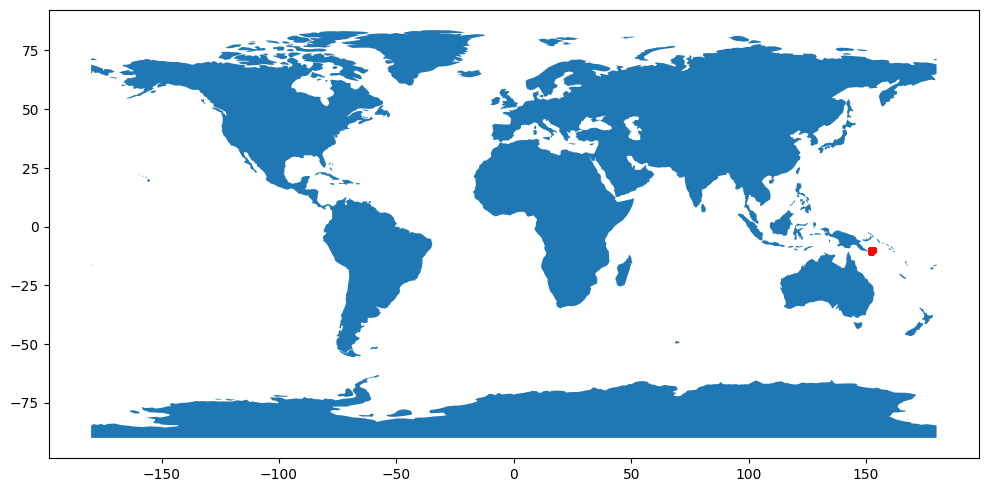

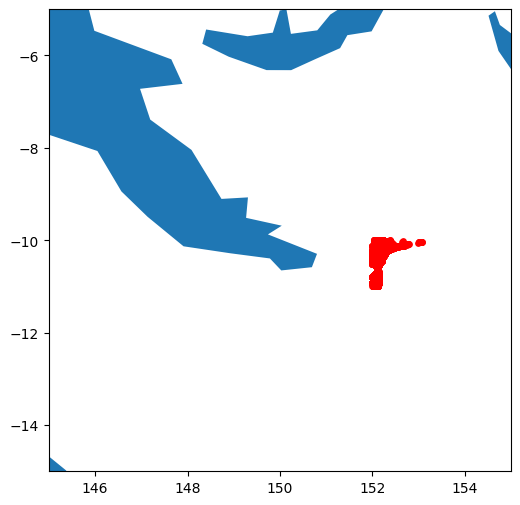

In [37]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_14_23_turning['Longitude'], ais_14_23_turning['Latitude'])]
gdf = GeoDataFrame(ais_14_23_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship >23 knots

In [38]:
ais_more_23[ais_more_23["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
3240583,2023-12-10 06:33:32.458,BSVDM,A,1.0,373046000.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.299000,10.299,0.0
5237369,2024-01-07 15:43:01.797,BSVDM,B,1.0,477346200.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.299000,9.299,0.0
5238977,2024-01-07 16:15:20.882,BSVDM,B,3.0,477346200.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:08.480000,8.480,0.0
5243157,2024-01-07 18:07:41.136,BSVDM,B,1.0,477346200.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:08.519000,8.519,0.0
5244716,2024-01-07 18:51:51.885,BSVDM,A,1.0,477346200.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.361000,10.361,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210514,2023-12-10 01:20:37.775,BSVDM,A,1.0,636018731,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:08.841000,8.841,0.0
3211828,2023-12-10 01:31:38.797,BSVDM,A,1.0,636018731,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.760000,9.760,0.0
5550692,2024-01-12 15:59:25.948,BSVDM,A,1.0,636018731,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.080000,9.080,0.0
5550713,2024-01-12 15:59:47.509,BSVDM,A,1.0,636018731,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.141000,10.141,0.0


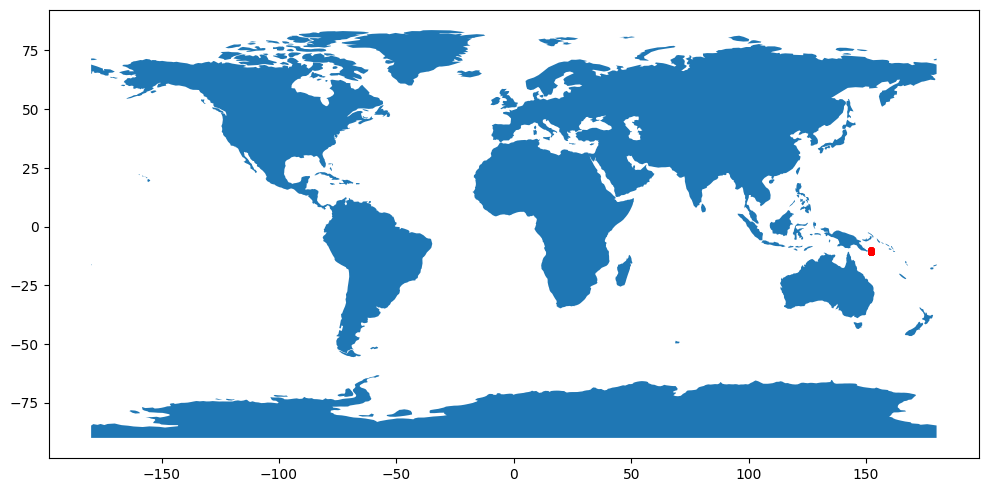

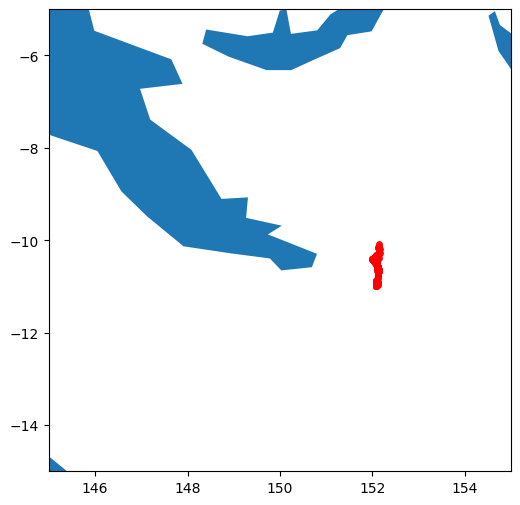

In [39]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_more_23['Longitude'], ais_more_23['Latitude'])]
gdf = GeoDataFrame(ais_more_23, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship >23 knots and changing course

In [40]:
ais_more_23_turning[ais_more_23_turning["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
1019719,2023-11-10 15:55:35.437,BSVDM,A,1.0,356362000.0,Underway using engine,0.0,0.0,251.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:08.559000,8.559,0.0
3606052,2023-12-15 05:01:40.388,BSVDM,B,1.0,370986000.0,Underway using engine,0.0,0.0,254.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.402000,9.402,0.0
3244064,2023-12-10 07:30:41.445,BSVDM,B,3.0,373046000.0,Underway using engine,0.0,0.0,1.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.677000,10.677,0.0
5239489,2024-01-07 16:26:21.944,BSVDM,B,1.0,477346200.0,Underway using engine,0.0,0.0,253.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.560000,9.560,0.0
5245203,2024-01-07 19:04:31.244,BSVDM,A,1.0,477346200.0,Underway using engine,0.0,0.0,251.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.460000,9.460,0.0
5560918,2024-01-12 18:55:16.148,BSVDM,B,1.0,636018731.0,Underway using engine,0.0,0.0,254.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.600000,9.600,0.0
2807151,2023-12-04 00:59:22.509,BSVDM,B,1.0,210526000,Underway using engine,0.0,0.0,254.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.720000,10.720,0.0
2807545,2023-12-04 01:07:22.333,BSVDM,B,1.0,210526000,Underway using engine,0.0,0.0,253.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:11.183000,11.183,0.0
2808886,2023-12-04 01:33:20.915,BSVDM,B,1.0,210526000,Underway using engine,0.0,0.0,253.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.312000,10.312,0.0
2483014,2023-11-29 17:33:48.862,BSVDM,A,1.0,232015131,Underway using engine,0.0,0.0,1.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.782000,10.782,0.0


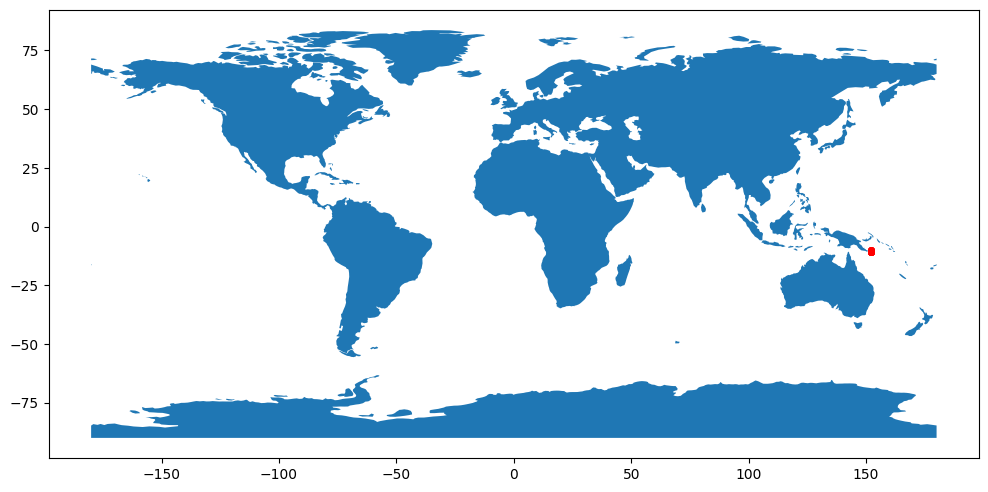

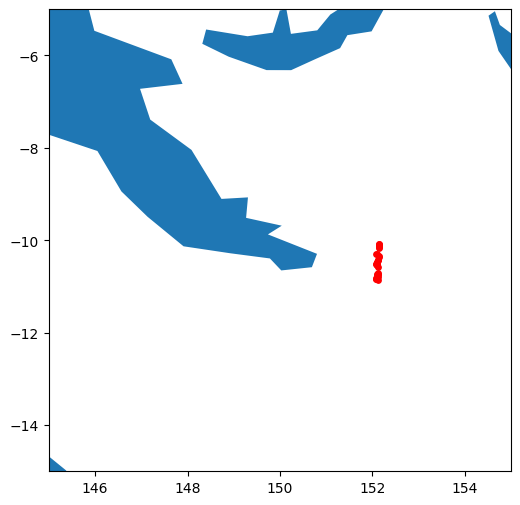

In [41]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_more_23_turning['Longitude'], ais_more_23_turning['Latitude'])]
gdf = GeoDataFrame(ais_more_23_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Create a histogram to see the distribution of the time intervals between consecutive messages of a vessel

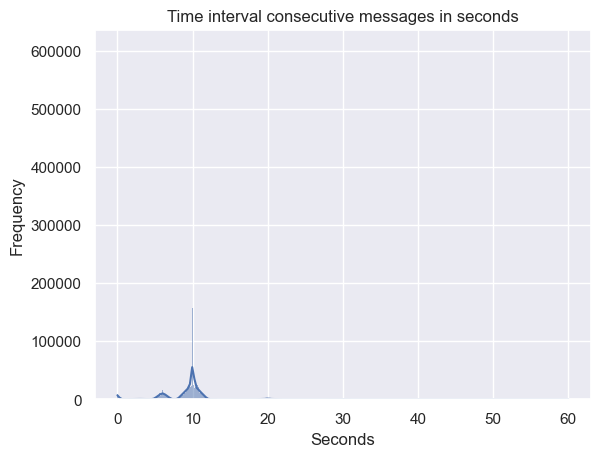

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.histplot(data=ais_subset, x="seconds", kde=True) # Change to x='minutes' if needed

plt.title('Time interval consecutive messages in seconds')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

plt.show()

Calculate/ Determine whether the zone is a dead/ shadow zone or not

In [54]:
# Define thresholds to determine what is a deadzone
dead_zone_threshold = 60  # seconds
possible_dead_zone_threshold = 45  # seconds

# Label data points
ais['Zone'] = ais.apply(
    lambda row: 'No Dead Zone' if row['Navigation Status'] in ['At anchor', 'Moored']
    else ('Dead Zone' if row['seconds'] > dead_zone_threshold 
          else ('Possible Dead Zone' if row['seconds'] > possible_dead_zone_threshold 
                else 'No Dead Zone')),
    axis=1
)

# Check results
ais["Zone"].head()


81934    No Dead Zone
81949    No Dead Zone
81965    No Dead Zone
81982    No Dead Zone
81998    No Dead Zone
Name: Zone, dtype: object

Create bounding box

In [56]:
import numpy as np

# Define the grid size
grid_size = 0.1  # degrees, adjust as necessary

# Create grid
long_min, long_max = ais['Longitude'].min(), ais['Longitude'].max()
lat_min, lat_max = ais['Latitude'].min(), ais['Latitude'].max()

long_bins = np.arange(long_min, long_max + grid_size, grid_size)
lat_bins = np.arange(lat_min, lat_max + grid_size, grid_size)

# Create a grid of polygons
import shapely.geometry
from shapely.geometry import box

grid_polygons = [box(lon, lat, lon + grid_size, lat + grid_size) for lon in long_bins[:-1] for lat in lat_bins[:-1]]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_polygons}, crs="EPSG:4326")


Assign Zones to grid cells

In [58]:
import geopandas as gpd

# Convert data to GeoDataFrame
ais_gdf = gpd.GeoDataFrame(ais, geometry=gpd.points_from_xy(ais.Longitude, ais.Latitude), crs="EPSG:4326")

# Spatial join to find which grid cells contain the data points
joined = gpd.sjoin(ais_gdf, grid_gdf, how="left", predicate='within')

# Aggregate the zones within each grid cell
zone_counts = joined.groupby('index_right')['Zone'].value_counts().unstack().fillna(0)

# Determine the zone status for each grid cell
def determine_zone(row):
    if row.get('Dead Zone', 0) > 0:
        return 'Dead Zone'
    elif row.get('Possible Dead Zone', 0) > 0:
        return 'Possible Dead Zone'
    else:
        return 'No Dead Zone'

grid_gdf['Zone'] = zone_counts.apply(determine_zone, axis=1)


Plot the results

In [60]:
#Fill nan values
grid_gdf['Zone'].fillna('No Dead Zone', inplace=True)

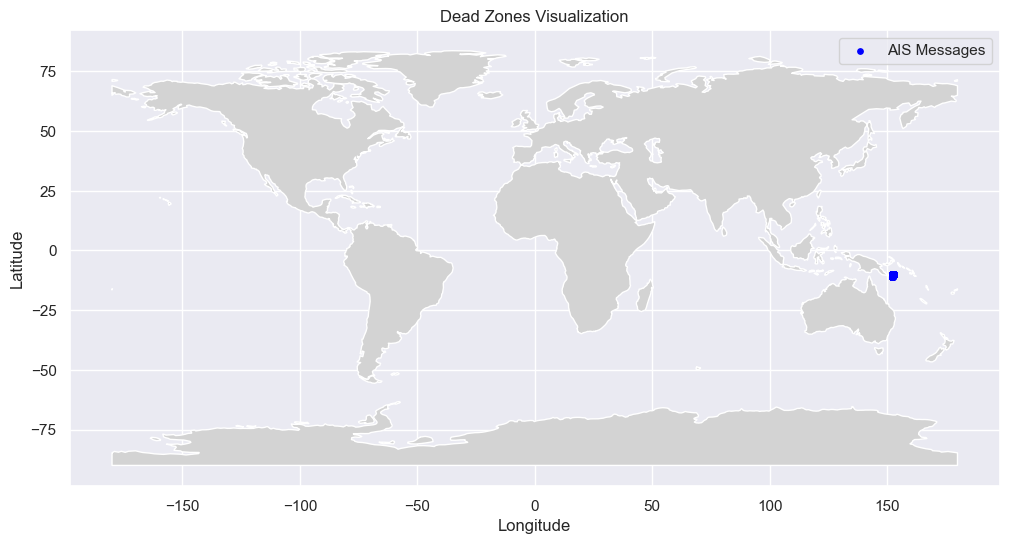

In [62]:
import matplotlib.pyplot as plt

# Define colors
colors = {'Dead Zone': 'red', 'Possible Dead Zone': 'yellow', 'No Dead Zone': 'green'}

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
base = world.plot(ax=ax, color='lightgrey')

grid_gdf.plot(ax=base, color=grid_gdf['Zone'].map(colors), edgecolor='black', alpha=0.5)

# Plot the original points (optional)
ais_gdf.plot(ax=ax, marker='o', color='blue', markersize=15, label='AIS Messages')

plt.legend()
plt.title('Dead Zones Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


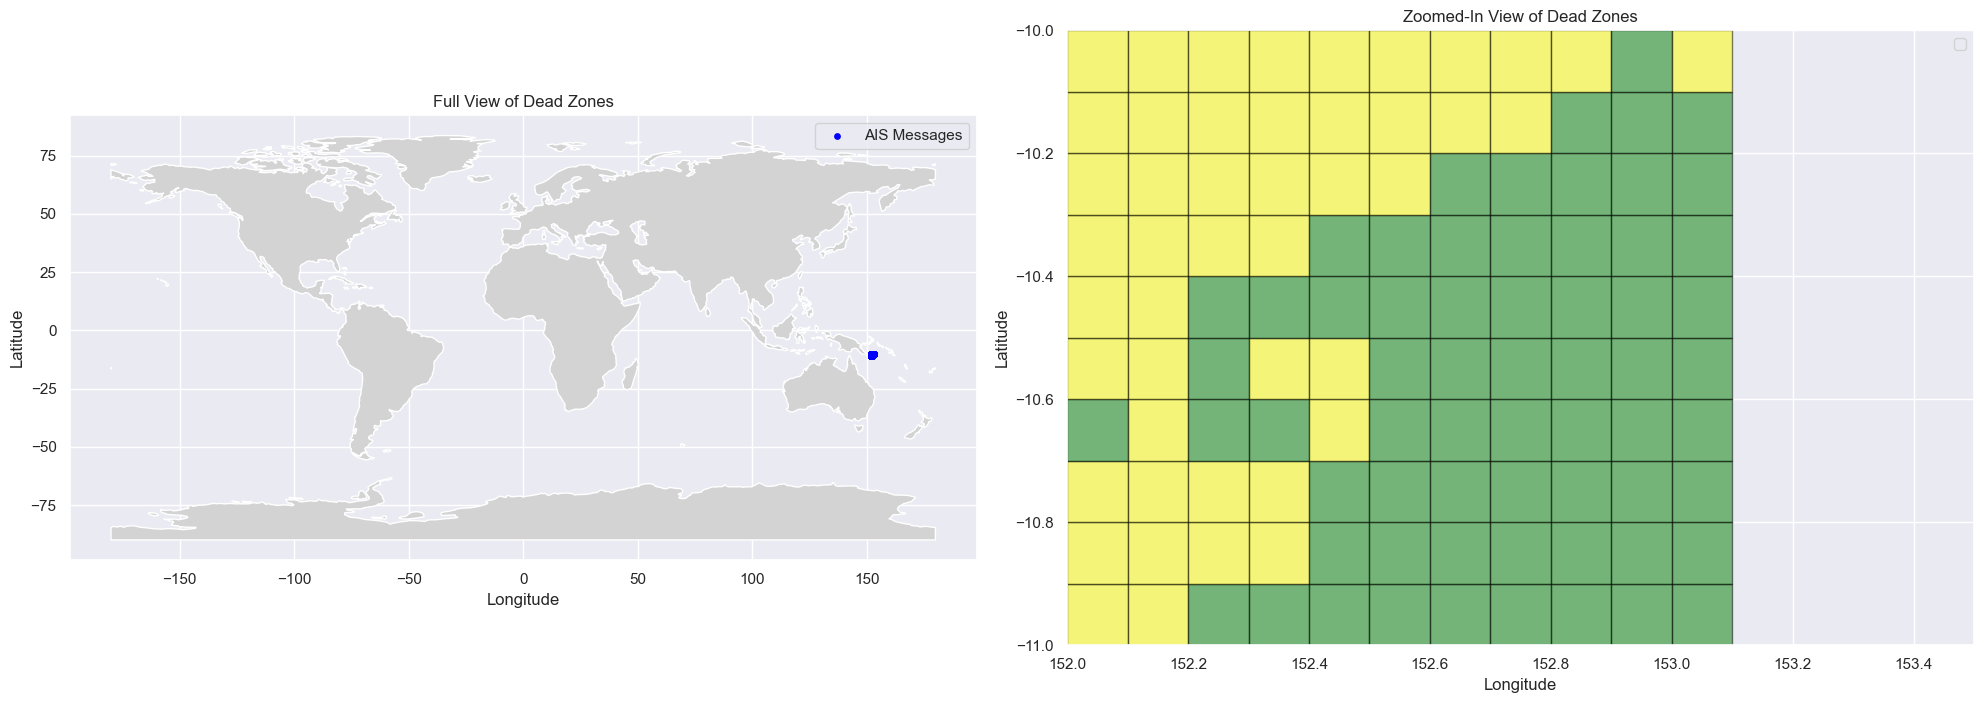

In [66]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define colors
colors = {'Dead Zone': 'red', 'Possible Dead Zone': 'yellow', 'No Dead Zone': 'green'}

# Create a figure with two subplots (one for full view and one for zoomed-in view)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Full view plot
ax[0].set_title('Full View of Dead Zones')
world.plot(ax=ax[0], color='lightgrey')
grid_gdf.plot(ax=ax[0], color=grid_gdf['Zone'].map(colors), edgecolor='black', alpha=0.5)
ais_gdf.plot(ax=ax[0], marker='o', color='blue', markersize=15, label='AIS Messages')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].legend()

# Zoomed-in view plot
# Define zoomed-in area
zoom_xlim = [152.0, 153.5]  # Update these values based on your data
zoom_ylim = [-11.0, -10.0]  # Update these values based on your data

ax[1].set_title('Zoomed-In View of Dead Zones')
world.plot(ax=ax[1], color='lightgrey')
grid_gdf.plot(ax=ax[1], color=grid_gdf['Zone'].map(colors), edgecolor='black', alpha=0.5)
#ais_gdf.plot(ax=ax[1], marker='o', color='blue', markersize=15, label='AIS Messages')
ax[1].set_xlim(zoom_xlim)
ax[1].set_ylim(zoom_ylim)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()
